# XGBoost Model

The XGBoost library allows to measure and plot the feature importance of a model. This is interesting for the following reasons: Model interpretability if the features are explainable, and also feature selection, where we can select the features to keep in (and the features to drop) the input dataset to get the best results. This step and the hyperparameter tuning step can be run iteratively in order to obtain the best features and the best hyperparameter comnbination.

In [44]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../scripts')
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import warnings
warnings.filterwarnings('ignore')
import pickle
from IPython.display import display, HTML
from xgboost import XGBClassifier
from hyperopt import hp,STATUS_OK, tpe, Trials, fmin

In [3]:
import scoring_and_evaluation
import XGBoost_feature_selection
import XGBoost_hyperparameter_tuning
import preprocessing

In [4]:
from scoring_and_evaluation import evaluate_model_with_cv
from XGBoost_feature_selection import feature_selection_with_thresholds
from XGBoost_hyperparameter_tuning import objective_function, hyperparameter_tuning
from preprocessing import save_list_to_pkl, load_list_from_pkl

In [5]:
%load_ext autoreload
%autoreload 2

In [4]:
importlib.reload(scoring_and_evaluation)
importlib.reload(XGBoost_feature_selection)
importlib.reload(XGBoost_hyperparameter_tuning)
importlib.reload(preprocessing)

<module 'preprocessing' from 'C:\\Users\\Jorge\\Desktop\\Data_Science\\Projects\\Depression_repo\\notebooks\\../scripts\\preprocessing.py'>

In [10]:
list_path = '../data/lists/'
metadata_file = '../data/processed/metadata.csv'
metadata_df = pd.read_csv(metadata_file)
display(HTML(metadata_df.to_html()))

,DataFrame,Shape,Comments
0,df_input,"(33320, 127)",Complete cleaned input data
1,df_study,"(9227, 87)",Cleaned + filtered input data based on paper's specifications + deleted features missing >10% data
2,data,"(9227, 83)",df_study without target variables
3,target_cat,"(9227,)",target phq9_cat_end from df_study
4,data_train,"(8304, 83)",90% of df data for model training
5,data_test,"(923, 83)",10% of df data for model testing
6,target_train,"(8304,)",90% of df target_cat for model training
7,target_test,"(923,)",10% of df target_cat for model testing
8,X_train_full,"(8304, 143)",data_train df with all additional feature engineering columns (+50)
9,X_train_full_preprocessed,"(8304, 145)","X_train_full df with preprocessing (imputation, scaling...)"


In [9]:
model_xgb = XGBClassifier(n_estimators=210,
                          max_depth=8,
                          learning_rate=0.83,
                          subsample=1.0,
                          colsample_bytree=0.95,
                          colsample_bynode=0.95,
                          colsample_bylevel=0.95,
                          max_delta_step= 0,
                          max_leaves=250,
                          min_child_weight = 1.7,
                          reg_lambda = 1.35,
                          reg_alpha = 0,
                          multi_class='multinomial',
                          use_label_encoder=False,
                          error_score='raise', 
                          n_jobs=4)

In [14]:
data_add_features_preprocessed = pd.read_pickle(r'../data/processed/data_add_features_preprocessed')

[10:03:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "error_score", "multi_class" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:03:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "error_score", "multi_class" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some

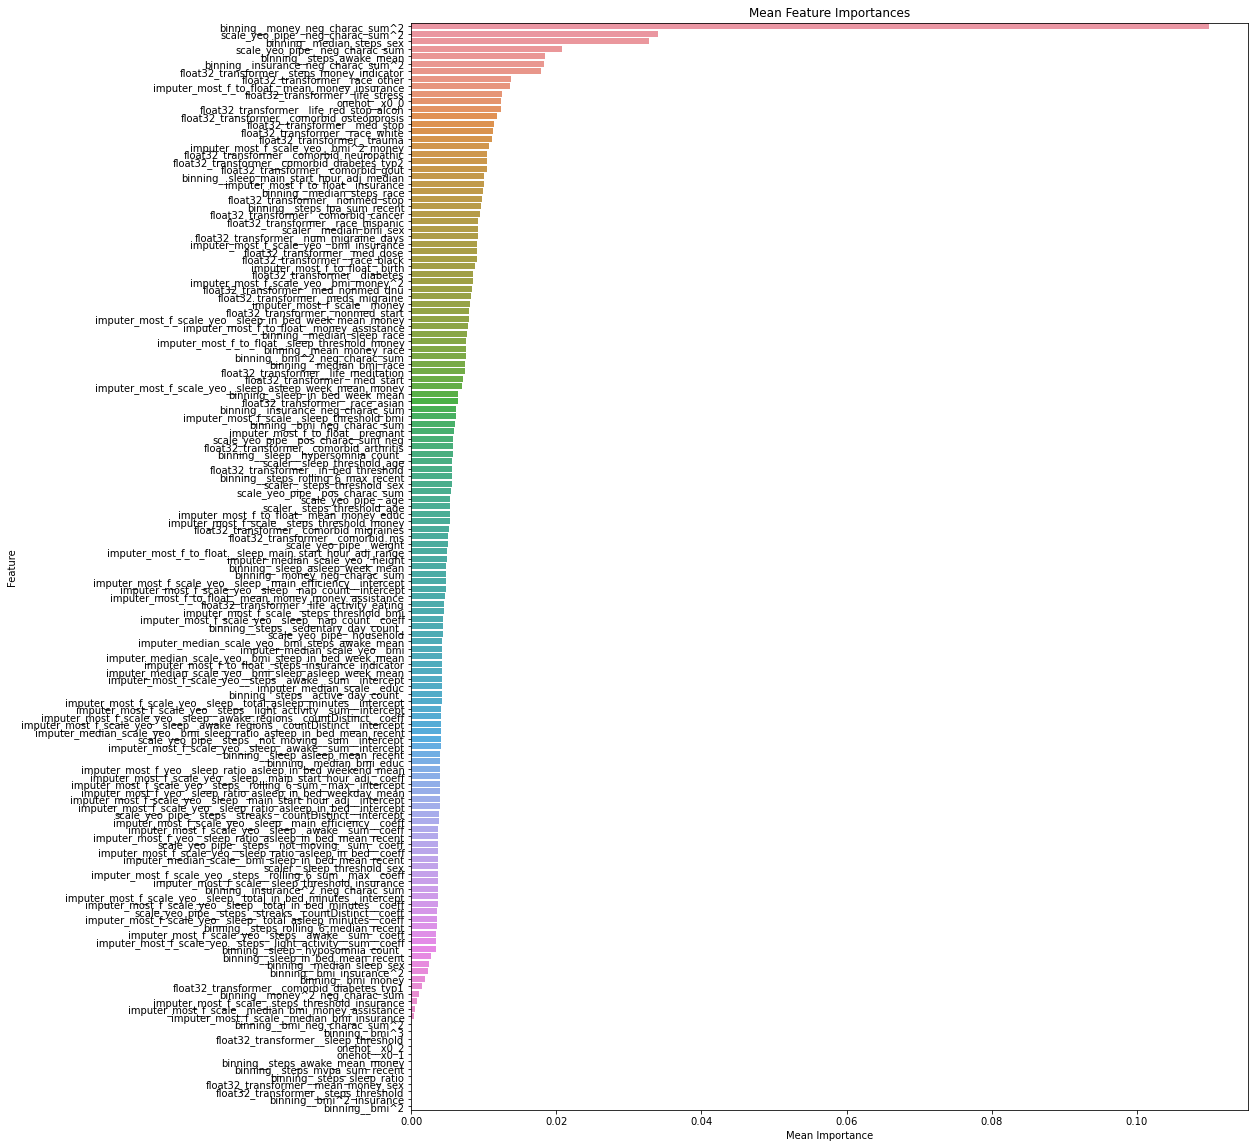

In [42]:
evaluation_df_1, confusion_matrices_1, reports_1, feature_importance_df_1 = evaluate_model_with_cv(X = data_add_features_preprocessed, y = target_cat, model = model_xgb, n_splits = 5, plot = True)

In [43]:
evaluation_df_1

,Metric,Mean,Std
0,Accuracy,0.451607,0.010897
1,Cohen_s Kappa,0.431426,0.016519
2,F1 Score,0.433799,0.009793
3,Adjacent Accuracy,0.825729,0.008687


In [44]:
confusion_matrices_1

[array([[493, 160,  40,   6,   2],
        [224, 230,  70,  20,   4],
        [ 76, 138,  87,  26,  11],
        [ 28,  64,  37,  26,  14],
        [ 11,  30,  15,  22,  12]], dtype=int64),
 array([[502, 143,  47,   7,   2],
        [211, 227,  83,  22,   5],
        [ 95, 118,  91,  24,  10],
        [ 36,  47,  51,  25,   9],
        [ 14,  33,  19,  18,   7]], dtype=int64),
 array([[497, 144,  47,   9,   4],
        [205, 219,  98,  22,   4],
        [ 81, 130,  89,  29,   9],
        [ 35,  61,  42,  25,   5],
        [ 11,  25,  22,  20,  12]], dtype=int64),
 array([[497, 164,  30,   7,   2],
        [238, 205,  82,  21,   3],
        [ 76, 147,  88,  22,   5],
        [ 32,  62,  43,  22,   9],
        [ 16,  24,  20,  13,  17]], dtype=int64),
 array([[476, 162,  46,  13,   3],
        [212, 211,  91,  27,   8],
        [ 83, 144,  72,  28,  11],
        [ 29,  56,  49,  23,  11],
        [ 17,  17,  26,  16,  14]], dtype=int64)]

In [45]:
reports_1

[{'0.0': {'precision': 0.5925480769230769,
   'recall': 0.703281027104137,
   'f1-score': 0.6431833007175473,
   'support': 701},
  '1.0': {'precision': 0.36977491961414793,
   'recall': 0.4197080291970803,
   'f1-score': 0.39316239316239315,
   'support': 548},
  '2.0': {'precision': 0.3493975903614458,
   'recall': 0.257396449704142,
   'f1-score': 0.29642248722316866,
   'support': 338},
  '3.0': {'precision': 0.26,
   'recall': 0.15384615384615385,
   'f1-score': 0.1933085501858736,
   'support': 169},
  '4.0': {'precision': 0.27906976744186046,
   'recall': 0.13333333333333333,
   'f1-score': 0.18045112781954886,
   'support': 90},
  'accuracy': 0.4593716143011918,
  'macro avg': {'precision': 0.37015807086810626,
   'recall': 0.33351299863696926,
   'f1-score': 0.3413055718217063,
   'support': 1846},
  'weighted avg': {'precision': 0.43616767198459705,
   'recall': 0.4593716143011918,
   'f1-score': 0.44172536967637877,
   'support': 1846}},
 {'0.0': {'precision': 0.585081585081

In [46]:
feature_importance_df_1

,Importance
Feature,
binning__money_neg_charac_sum^2,0.109932
scale_yeo_pipe__neg_charac_sum^2,0.034004
binning__median_steps_sex,0.032799
scale_yeo_pipe__neg_charac_sum,0.020702
binning__steps_awake_mean,0.018486
...,...
binning__steps_sleep_ratio,0.000000
float32_transformer__mean_money_sex,0.000000
float32_transformer__steps_threshold,0.000000


In [47]:
selected_features = feature_importance_df_1.index[:80].tolist()

In [9]:
X_train_full_preprocessed = pd.read_pickle(r'../data/processed/X_train_full_preprocessed')
X_test_full_preprocessed = pd.read_pickle(r'../data/processed/X_test_full_preprocessed')
target_train = pd.read_pickle(r'../data/processed/target_train')
target_test = pd.read_pickle(r'../data/processed/target_test')
target_cat = pd.read_pickle(r'../data/processed/target_cat')

[10:48:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "error_score", "multi_class" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:48:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:48:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "error_score", "multi_class" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some

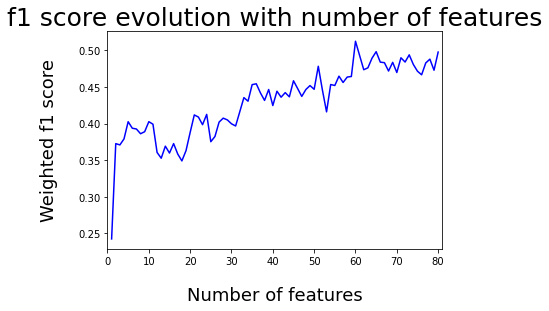

In [60]:
feature_list_1, thresholds_df_1, feat_selection_plot = feature_selection_with_thresholds(xgb_model_fs = model_xgb,
                                                                                         df_train = X_train_full_preprocessed[selected_features],
                                                                                         df_test = X_test_full_preprocessed[selected_features], 
                                                                                         target_for_train = target_train,
                                                                                         target_for_test = target_test)

In [61]:
feature_list_1

,Threshold,Number of features,f1 score
0,0.002446,80,0.497510
1,0.003341,79,0.472744
2,0.005707,78,0.487852
3,0.005759,77,0.482670
4,0.005945,76,0.466513
...,...,...,...
75,0.022525,5,0.402515
76,0.022568,4,0.379080
77,0.023255,3,0.370836
78,0.028156,2,0.372600


In [62]:
thresholds_df_1

,0
scaler__median_bmi_sex,0.002446
binning__sleep__hypersomnia_count_,0.003341
onehot__x0_0,0.005707
imputer_most_f_to_float__sleep_main_start_hour_adj_range,0.005759
binning__insurance_neg_charac_sum,0.005945
...,...
binning__median_bmi_race,0.022525
binning__bmi^2_neg_charac_sum,0.022568
binning__money_neg_charac_sum^2,0.023255
scale_yeo_pipe__neg_charac_sum^2,0.028156


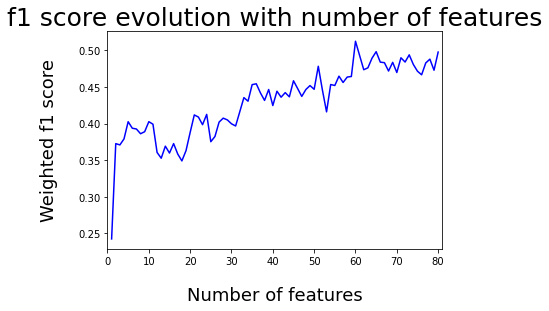

In [67]:
feat_selection_plot.figure

In [68]:
feature_list_1[feature_list_1['f1 score']>0.5]

,Threshold,Number of features,f1 score
20,0.007631,60,0.512286


In [81]:
selected_features_1 = thresholds_df_1[thresholds_df_1.values>0.007631].index.tolist()
save_list_to_pkl(selected_features_1, '../data/lists/','selected_features_1')

In [11]:
selected_features_1 = load_list_from_pkl(list_path+'selected_features_1.pkl')

## Hyperparameter Tuning

In [ ]:
def objective_function_with_cv(params):
    space, selected_features = params
    
    model_xgb = XGBClassifier(learning_rate = space['learning_rate'],
                              n_estimators = int(space['n_estimators']),
                              max_depth = int(space['max_depth']),
                              min_child_weight = space['min_child_weight'],
                              max_delta_step = int(space['max_delta_step']),
                              subsample = space['subsample'],
                              colsample_bytree = space['colsample_bytree'],
                              colsample_bylevel = space['colsample_bylevel'],
                              colsample_bynode = space['colsample_bynode'],
                              max_leaves = int(space['max_leaves']),
                              reg_alpha = space['reg_alpha'],
                              reg_lambda = space['reg_lambda'],
                              verbosity=0,
                              multi_class='multinomial',use_label_encoder=False,error_score='raise', n_jobs=4)
    
    results = evaluate_model_with_cv(data_add_features_preprocessed[list(selected_features)], target_cat, model_xgb, 5)
    score = results[0].loc[results[0]['Metric']=='Accuracy']['Mean'].values[0]
    f1 = results[0].loc[results[0]['Metric']=='F1 Score']['Mean'].values[0]
    cohen_kappa = results[0].loc[results[0]['Metric']=='Cohen_s Kappa']['Mean'].values[0]
    adjacent_accuracy = results[0].loc[results[0]['Metric']=='Adjacent Accuracy']['Mean'].values[0]
    
    print (f"balanced accuracy: {score}, f1 weighted = {f1}, Kappa = {cohen_kappa}, Adj. Acc. = {adjacent_accuracy}")
    return {'loss': -f1,
            'balanced_acc': -score,
            'status': STATUS_OK,
            'features': selected_features}

In [229]:
space_xgb_1 = {'learning_rate': hp.quniform('learning_rate', 0.01, 0.9, 0.05),
               'n_estimators': hp.quniform('n_estimators', 100, 1000, 100),
               'max_depth': hp.choice('max_depth', [3,4,5,6,7,8]),
               'min_child_weight': hp.quniform('min_child_weight', 1, 2, 0.1),
               'subsample': hp.quniform('subsample', 0.90, 1, 0.05),
               'colsample_bytree': hp.quniform('colsample_bytree', 0.92, 1, 0.05),
               'colsample_bylevel': hp.quniform('colsample_bylevel', 0.92, 1, 0.05),
               'colsample_bynode': hp.quniform('colsample_bynode', 0.88, 1, 0.05),
               'max_delta_step': hp.quniform('max_delta_step', 0.5, 1, 0.05),
               'max_leaves': hp.quniform('max_leaves', 100, 500, 50),
               'reg_lambda': hp.quniform('reg_lambda', 1.0, 1.6, 0.05)
              }

In [231]:
trials = Trials()

In [232]:
best_params_1 = fmin(objective_function_with_cv,
                    space=(space_xgb_1,selected_features_1),
                    algo=tpe.suggest, 
                    max_evals=150,
                    trials=trials
                   )

[19:07:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576:                                        
Parameters: { "error_score", "multi_class" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:07:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:08:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576:                                        
Parameters: { "error_score", "multi_class" } might not be used.

  This could be a false alarm, with some parameters getting used by lang

In [233]:
best_params_1 #balanced accuracy: 0.5202117520633495, f1 weighted = 0.5157696377935592, Kappa = 0.6027224440816388, Adj. Acc. = 0.8767749796674564

{'colsample_bylevel': 1.0,
 'colsample_bynode': 0.9500000000000001,
 'colsample_bytree': 1.0,
 'learning_rate': 0.8300000000000001,
 'max_delta_step': 0.7000000000000001,
 'max_depth': 5,
 'max_leaves': 170.0,
 'min_child_weight': 1.0,
 'n_estimators': 200.0,
 'reg_lambda': 1.25,
 'subsample': 1.0}

In [234]:
space_xgb_2 = {'learning_rate': hp.quniform('learning_rate', 0.01, 0.9, 0.05),
               'n_estimators': hp.quniform('n_estimators', 100, 500, 25),
               'max_depth': hp.choice('max_depth', [4.0,5.0,6.0]),
               'min_child_weight': hp.quniform('min_child_weight', 0.8, 1.02, 0.05),
               'subsample': hp.quniform('subsample', 0.95, 1, 0.05),
               'colsample_bytree': hp.quniform('colsample_bytree', 0.95, 1, 0.01),
               'colsample_bylevel': hp.quniform('colsample_bylevel', 0.95, 1, 0.01),
               'colsample_bynode': hp.quniform('colsample_bynode', 0.95, 1, 0.01),
               'max_delta_step': hp.quniform('max_delta_step', 0.6, 0.8, 0.0025),
               'max_leaves': hp.quniform('max_leaves', 150, 250, 10),
               'reg_lambda': hp.quniform('reg_lambda', 1.2, 1.4, 0.05)
              }

In [235]:
trials = Trials()
best_params_2 = fmin(objective_function_with_cv,
                    space=(space_xgb_2,selected_features_1),
                    algo=tpe.suggest, 
                    max_evals=150,
                    trials=trials
                   )

[21:35:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576:                                        
Parameters: { "error_score", "multi_class" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:35:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:35:11] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576:                                        
Parameters: { "error_score", "multi_class" } might not be used.

  This could be a false alarm, with some parameters getting used by lang

In [237]:
best_params_2 #balanced accuracy: 0.5233559119989899, f1 weighted = 0.5179595390821927, Kappa = 0.6122364035159211, Adj. Acc. = 0.8807855261651207

{'colsample_bylevel': 0.99,
 'colsample_bynode': 0.99,
 'colsample_bytree': 0.99,
 'learning_rate': 0.35000000000000003,
 'max_delta_step': 0.655,
 'max_depth': 2,
 'max_leaves': 220.0,
 'min_child_weight': 0.9,
 'n_estimators': 425.0,
 'reg_lambda': 1.25,
 'subsample': 0.9500000000000001}

In [14]:
space_xgb_3 = {'learning_rate': hp.loguniform('learning_rate', -3, 0),
               'n_estimators': hp.quniform('n_estimators', 400, 500, 10),
               'max_depth': hp.choice('max_depth', np.arange(8, 50, 1, dtype=int)),
               'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
               'subsample': hp.quniform('subsample', 0.90, 0.96, 0.001),
               'colsample_bytree': hp.quniform('colsample_bytree', 0.95, 1, 0.01),
               'colsample_bylevel': hp.quniform('colsample_bylevel', 0.95, 1, 0.01),
               'colsample_bynode': hp.quniform('colsample_bynode', 0.95, 1, 0.01),
               'max_delta_step': hp.quniform('max_delta_step', 0.64, 0.7, 0.0025),
               'max_leaves': hp.quniform('max_leaves', 200, 250, 5),
               'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
               'reg_lambda': hp.loguniform('reg_lambda', -5, -1)
              }

In [17]:
trials = Trials()
best_params_3 = fmin(objective_function_with_cv,
                    space=(space_xgb_3,selected_features_1),
                    algo=tpe.suggest, 
                    max_evals=30,
                    trials=trials
                   )

[08:47:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576:                                        
Parameters: { "error_score", "multi_class" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:47:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576:                                        
Parameters: { "error_score", "multi_class" } might not be used.

  This could be a false alarm, with some parameters getting used by lang

In [18]:
best_params_3 #balanced accuracy: 0.5234635496950852, f1 weighted = 0.5192701568337916, Kappa = 0.6136131240497988, Adj. Acc. = 0.8830614791521697

{'colsample_bylevel': 0.99,
 'colsample_bynode': 0.97,
 'colsample_bytree': 0.98,
 'learning_rate': 0.12219014942896811,
 'max_delta_step': 0.6725,
 'max_depth': 17,
 'max_leaves': 235.0,
 'min_child_weight': 0.5312590964947956,
 'n_estimators': 500.0,
 'reg_alpha': 0.03352760516064557,
 'reg_lambda': 0.02047128764077248,
 'subsample': 0.9450000000000001}

In [19]:
model_xgb_2 = XGBClassifier(n_estimators=500,
                            max_depth=17,
                            learning_rate=0.12219014942896811,
                            subsample=0.945,
                            colsample_bytree=0.98,
                            colsample_bynode=0.97,
                            colsample_bylevel=0.99,
                            max_delta_step= 0.6725,
                            max_leaves=235,
                            min_child_weight = 0.5312590964947956,
                            reg_lambda = 0.02047128764077248,
                            reg_alpha = 0.03352760516064557,
                            multi_class='multinomial',
                            use_label_encoder=False,
                            error_score='raise', 
                            n_jobs=4)

[11:35:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "error_score", "multi_class" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:35:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:36:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "error_score", "multi_class" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some

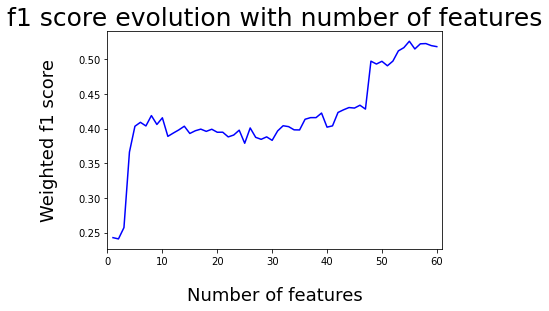

In [20]:
feature_list_2, thresholds_df_2, feat_selection_plot_2 = feature_selection_with_thresholds(xgb_model_fs = model_xgb_2,
                                                                                           df_train = X_train_full_preprocessed[selected_features_1],
                                                                                           df_test = X_test_full_preprocessed[selected_features_1], 
                                                                                           target_for_train = target_train,
                                                                                           target_for_test = target_test)

In [21]:
feature_list_2[feature_list_2['f1 score']>0.5]

,Threshold,Number of features,f1 score
0,0.009323,60,0.518352
1,0.011364,59,0.519815
2,0.011485,58,0.522781
3,0.012074,57,0.522407
4,0.012301,56,0.515010
5,0.012418,55,0.526138
6,0.012469,54,0.516904
7,0.012758,53,0.512239


In [22]:
selected_features_2 = thresholds_df_2[thresholds_df_2.values>0.011485].index.tolist()
#save_list_to_pkl(selected_features_2, '../data/lists/','selected_features_2')

In [12]:
selected_features_2 = load_list_from_pkl('../data/lists/selected_features_2.pkl')

In [23]:
len(selected_features_2)

57

In [ ]:
{'colsample_bylevel': 0.972,
 'colsample_bynode': 0.984,
 'colsample_bytree': 0.967,
 'learning_rate': 0.122663990115494,
 'max_delta_step': 0.6825,
 'max_depth': 11,
 'max_leaves': 234.0,
 'min_child_weight': 0.41260085649567163,
 'min_split_loss': 100.0,
 'n_estimators': 486.0,
 'reg_alpha': 0.01828687399622085,
 'reg_lambda': 0.06289243410776137,
 'subsample': 0.9550000000000001}

In [35]:
space_xgb_4 = {'colsample_bylevel': hp.quniform('colsample_bylevel', 0.970, 0.974, 0.0005),
               'colsample_bynode': hp.quniform('colsample_bynode', 0.983, 0.985, 0.0005),
               'colsample_bytree': hp.quniform('colsample_bytree', 0.966, 0.968, 0.0005),
               'learning_rate': hp.loguniform('learning_rate', -2.2, -1.5),
               'max_delta_step': hp.quniform('max_delta_step', 0.677, 0.686, 0.0025),
               'max_depth': hp.choice('max_depth', np.arange(10, 17, 1, dtype=int)),
               'max_leaves': hp.quniform('max_leaves', 230, 238, 1),
               'min_child_weight': hp.loguniform('min_child_weight', -0.91, -0.7),
               'min_split_loss': hp.quniform('min_split_loss', 90, 110, 2),
               'n_estimators': hp.quniform('n_estimators', 482, 489, 1),
               'reg_alpha': hp.loguniform('reg_alpha', -4.2, -3.7),
               'reg_lambda': hp.loguniform('reg_lambda', -3.22, -2.73),
               'subsample': hp.quniform('subsample', 0.95, 0.96, 0.0001)
              }

In [36]:
trials = Trials()
best_params_4 = fmin(objective_function_with_cv,
                    space=(space_xgb_4,selected_features_2),
                    algo=tpe.suggest, 
                    max_evals=20,
                    return_argmin=False,
                    trials=trials
                   )

balanced accuracy: 0.522270961604524, f1 weighted = 0.5179901233483691, Kappa = 0.6108897300689925, Adj. Acc. = 0.8834947311553287
balanced accuracy: 0.5231378179437266, f1 weighted = 0.5189759096830862, Kappa = 0.6143545470934172, Adj. Acc. = 0.8830611268192856
balanced accuracy: 0.5222708441602293, f1 weighted = 0.5182627502174392, Kappa = 0.6135379185987259, Adj. Acc. = 0.8841450202150993
balanced accuracy: 0.5224873527175141, f1 weighted = 0.517735490979619, Kappa = 0.6102881768174199, Adj. Acc. = 0.8823027302862411
balanced accuracy: 0.5178281026580581, f1 weighted = 0.5139616698790237, Kappa = 0.60662583900532, Adj. Acc. = 0.8812190130568694
balanced accuracy: 0.5220546292136812, f1 weighted = 0.5172918870987535, Kappa = 0.6102321890371228, Adj. Acc. = 0.8831697627918859
balanced accuracy: 0.520862745788888, f1 weighted = 0.5166976270215577, Kappa = 0.6112835997773499, Adj. Acc. = 0.8841449614929517
balanced accuracy: 0.5197782064494535, f1 weighted = 0.5155076816589528, Kappa = 

In [38]:
best_params_4[0] #balanced accuracy: 0.5254157674837854, f1 weighted = 0.5215019606668132, Kappa = 0.6174568875086179, Adj. Acc. = 0.885121158470523

{'colsample_bylevel': 0.9725,
 'colsample_bynode': 0.9845,
 'colsample_bytree': 0.967,
 'learning_rate': 0.19126026956078931,
 'max_delta_step': 0.68,
 'max_depth': 15,
 'max_leaves': 231.0,
 'min_child_weight': 0.40374195632329707,
 'min_split_loss': 108.0,
 'n_estimators': 484.0,
 'reg_alpha': 0.02224737866704274,
 'reg_lambda': 0.05593919971672738,
 'subsample': 0.9511000000000001}

## Train and save final model

In [39]:
final_model = XGBClassifier(
    colsample_bylevel=0.9725,
    colsample_bynode=0.9845,
    colsample_bytree=0.967,
    learning_rate=0.19126026956078931,
    max_delta_step=0.68,
    max_depth=15,
    max_leaves=231,
    min_child_weight=0.40374195632329707,
    min_split_loss=108.0,
    n_estimators=484,
    reg_alpha=0.02224737866704274,
    reg_lambda=0.05593919971672738,    
    subsample=0.945,
    multi_class='multinomial',
    use_label_encoder=False,
    error_score='raise', 
    n_jobs=4)

In [42]:
final_model.fit(data_add_features_preprocessed[selected_features_2], target_cat)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9725,
              colsample_bynode=0.9845, colsample_bytree=0.967,
              enable_categorical=False, error_score='raise', gamma=108,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.19126026956078931, max_delta_step=0.68,
              max_depth=15, max_leaves=231,
              min_child_weight=0.40374195632329707, min_split_loss=108.0,
              missing=nan, monotone_constraints='()', multi_class='multinomial',
              n_estimators=484, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0.02224737866704274, reg_lambda=0.05593919971672738,
              scale_pos_weight=None, subsample=0.945, ...)

In [46]:
with open('../models/xgboost_mod.bin','wb') as f_out:
    pickle.dump(final_model, f_out)